In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import api_key
from citipy import citipy
import json




In [9]:
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

625

In [11]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city=
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -159.32,
        "lat": 22.08
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.56,
        "feels_like": 76.78,
        "temp_min": 73,
        "temp_max": 78.8,
        "pressure": 1017,
        "humidity": 83
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.41,
        "deg": 50
    },
    "rain": {
        "1h": 0.51
    },
    "clouds": {
        "all": 75
    },
    "dt": 1596815406,
    "sys": {
        "type": 1,
        "id": 7873,
        "country": "US",
        "sunrise": 1596816732,
        "sunset": 1596863625
    },
    "timezone": -36000,
    "id": 5848280,
    "name": "Kapaa",
    "cod": 200
}


In [13]:
print(requests.get(query_url + city))

<Response [200]>


In [14]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
processing_record = 1
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        processing_record +=1
    except:
        print("Not found")
    continue
    
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Vaini
Processing Record 2 | Pisco
Processing Record 3 | Hambantota
Not found
Processing Record 4 | Busselton
Processing Record 5 | Saint Paul Harbor
Processing Record 6 | Khovd
Processing Record 7 | Erenhot
Processing Record 8 | Poum
Processing Record 9 | Lopatino
Processing Record 10 | Saskylakh
Processing Record 11 | Yakuplu
Processing Record 12 | Lebu
Processing Record 13 | Port Elizabeth
Processing Record 14 | Mataura
Processing Record 15 | Larsnes
Processing Record 16 | Itoman
Processing Record 17 | Songjianghe
Processing Record 18 | Port Hardy
Processing Record 19 | Cidreira
Processing Record 20 | Eenhana
Processing Record 21 | Cabo San Lucas
Processing Record 22 | Katherine
Processing Record 23 | Hammerfest
Processing Record 24 | Klaksvík
Not found
Not found
Processing Record 25 | Lompoc
Processing Record 26 | Vao
Processing Record 27 | Puerto Ayora
Processing Record 28 | Maumere
Processing Record 29 

Processing Record 244 | Kalmar
Processing Record 245 | Marawi
Processing Record 246 | Bathsheba
Processing Record 247 | Manta
Processing Record 248 | Jieshi
Processing Record 249 | Najrān
Processing Record 250 | Jumla
Processing Record 251 | Alice Springs
Processing Record 252 | Ginda
Processing Record 253 | Fălciu
Processing Record 254 | Luganville
Processing Record 255 | Bilibino
Processing Record 256 | Tiksi
Processing Record 257 | Atar
Processing Record 258 | Stolin
Processing Record 259 | Staropesterevo
Processing Record 260 | Yar-Sale
Processing Record 261 | Banda Aceh
Processing Record 262 | Aswān
Processing Record 263 | Aloleng
Processing Record 264 | Jiazi
Not found
Processing Record 265 | Champerico
Not found
Processing Record 266 | Anūpgarh
Processing Record 267 | Nantucket
Processing Record 268 | Nandu
Processing Record 269 | Coquimbo
Not found
Processing Record 270 | Ozinki
Processing Record 271 | Rivadavia
Processing Record 272 | Tuktoyaktuk
Processing Record 273 | Berlev

Processing Record 484 | Natal
Processing Record 485 | Jijiga
Processing Record 486 | Shirokiy
Processing Record 487 | Arequipa
Processing Record 488 | Altay
Not found
Processing Record 489 | Salalah
Processing Record 490 | Roebourne
Not found
Processing Record 491 | Sumbe
Processing Record 492 | Oussouye
Processing Record 493 | Nueva Imperial
Processing Record 494 | Rotifunk
Processing Record 495 | Pandan
Not found
Processing Record 496 | Mersing
Processing Record 497 | Mahon
Processing Record 498 | Alugan
Processing Record 499 | Rio Grande
Processing Record 500 | Back Mountain
Not found
Processing Record 501 | Camaná
Processing Record 502 | Dalvik
Processing Record 503 | Jacareacanga
Processing Record 504 | Salym
Processing Record 505 | Santa Marta
Not found
Processing Record 506 | Safford
Processing Record 507 | Calafell
Processing Record 508 | Windhoek
Processing Record 509 | Nieves
Processing Record 510 | Dingle
Processing Record 511 | Tahoua
Processing Record 512 | Severodvinsk
Pr

In [15]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               575
Country            575
Date               575
Latitude           575
Longitude          575
Max Temperature    575
Humidity           575
Cloudiness         575
Wind Speed         575
dtype: int64

In [16]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,1596815759,-21.20,-175.20,64.4,88,20,4.70
1,Pisco,PE,1596815760,-13.70,-76.22,63.0,82,75,3.36
2,Hambantota,LK,1596815760,6.12,81.12,82.4,83,40,17.22
3,Busselton,AU,1596815760,-33.65,115.33,52.0,55,100,15.14
4,Saint Paul Harbor,US,1596815760,57.79,-152.41,53.6,81,90,3.36


In [22]:
weather_data.to_csv("WeatherPy/Data/weather_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'WeatherPy/Data/weather_data.csv'

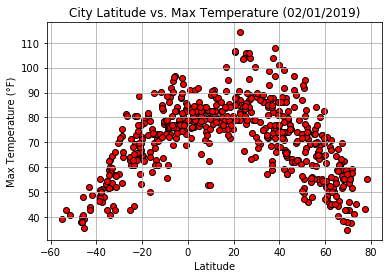

In [23]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (08/07/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

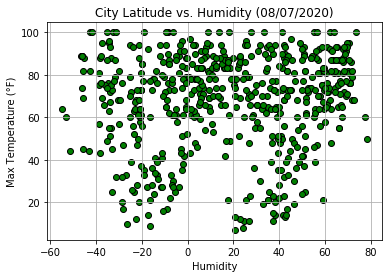

In [25]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (08/07/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Humidity")
plt.grid(True)

plt.show()

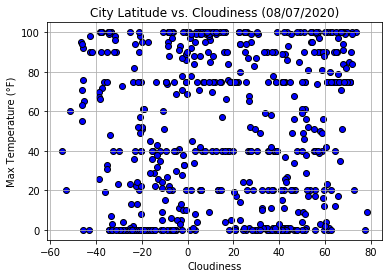

In [26]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (08/07/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Cloudiness")
plt.grid(True)

plt.show()

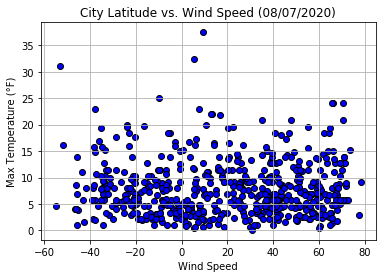

In [27]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (08/07/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Wind Speed")
plt.grid(True)

plt.show()